In [16]:
import zipfile
import os

# Function to Define the path for the uploaded zip file and extract location
zip_file_path = r"C:\Users\jamie\Downloads\steam-200k.csv.zip"
extract_path = r"C:\Users\jamie\Downloads"

# Functions to Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Functions to Check the extracted files
extracted_files = os.listdir(extract_path)
print(extracted_files)


['Anaconda3-2024.02-1-Windows-x86_64.exe', 'archive (1).zip', 'archive (2).zip', 'archive.zip', 'Assignment week 1 TASK (1).ipynb', 'Assignment week 1 TASK (2).ipynb', 'Assignment week 1 TASK.ipynb', 'bookloans.csv', 'bookloans_2024.csv', 'books.csv', 'books_2024.csv', 'BPP4D3E (1).zip', 'BPP4D3E.zip', 'Copy of Untitled4.ipynb', 'CSC-40076-A2 Feedback 24022119 (1).xlsx', 'CSC-40076-A2 Feedback 24022119.xlsx', 'CSC40076 Reassessment 1 24022119 Feedback.xlsx', 'CSC40094 4.8 Assessment ARUBAYI (1).pdf', 'CSC40094 4.8 Assessment ARUBAYI (2).pdf', 'CSC40094 4.8 Assessment ARUBAYI (3).pdf', 'CSC40094 4.8 Assessment ARUBAYI.pdf', 'desktop.ini', 'download.png', 'IMG_2687 (1).png', 'IMG_2687.png', 'members_2024.csv', 'Miniconda3-latest-Windows-x86_64 (1).exe', 'Miniconda3-latest-Windows-x86_64.exe', 'moon dataset onajeme.ipynb', 'onajeme arubayi .docx', 'onajeme assessment 1 (1).ipynb', 'onajeme assessment 1.ipynb', 'onajeme assessment 2.ipynb', 'python-3.8.2 (1).exe', 'python-3.8.2.exe', 'Pyth

In [12]:
import pandas as pd

# Function to Load the CSV file into a DataFrame
csv_file_path = r"C:\Users\jamie\Downloads\steam-200k.csv.zip"
steam_df = pd.read_csv(csv_file_path)

# Function to display the first few rows of the dataset to check
steam_df.head()


,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [17]:
# Function to Assign appropriate column names
steam_df.columns = ['User_ID', 'Game_Title', 'Action', 'Hours_Played', 'Flag']

# Function to Check for any missing values and get a summary statistics
steam_df.info(), steam_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   User_ID       199999 non-null  int64  
 1   Game_Title    199999 non-null  object 
 2   Action        199999 non-null  object 
 3   Hours_Played  199999 non-null  float64
 4   Flag          199999 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


(None,
             User_ID   Hours_Played      Flag
 count  1.999990e+05  199999.000000  199999.0
 mean   1.036556e+08      17.874468       0.0
 std    7.208084e+07     138.057292       0.0
 min    5.250000e+03       0.100000       0.0
 25%    4.738420e+07       1.000000       0.0
 50%    8.691201e+07       1.000000       0.0
 75%    1.542309e+08       1.300000       0.0
 max    3.099031e+08   11754.000000       0.0)

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming you already have the CSV file loaded as a DataFrame
data = pd.read_csv( r"C:\Users\jamie\Downloads\steam-200k.csv.zip")  # Replace with your actual file path

# Assign appropriate column names if needed
data.columns = ['User_ID', 'Game_Title', 'Action', 'Hours_Played', 'Flag']

# Drop the 'Flag' column as it is not useful
data = data.drop(columns=['Flag'])

# Label Encoding for categorical features
label_encoder = LabelEncoder()

# Encode 'Action' (target variable): 'purchase' -> 0, 'play' -> 1
data['Action'] = label_encoder.fit_transform(data['Action'])

# Encode 'Game_Title' (categorical feature)
data['Game_Title'] = label_encoder.fit_transform(data['Game_Title'])

# Split the dataset into features (X) and labels (y)
X = data[['User_ID', 'Game_Title', 'Hours_Played']]
y = data['Action']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     14184
           1       0.99      0.99      0.99     25816

    accuracy                           0.99     40000
   macro avg       0.98      0.99      0.98     40000
weighted avg       0.99      0.99      0.99     40000

Confusion Matrix:
 [[13985   199]
 [  387 25429]]


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Function to Build the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Function to Perform 5-Fold Cross-Validation (you can change the number of folds)
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Display the cross-validation scores
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean():.2f}')
print(f'Standard Deviation: {cv_scores.std():.2f}')


Cross-Validation Accuracy Scores: [0.983525   0.98885    0.98265    0.986725   0.98922473]
Mean Accuracy: 0.99
Standard Deviation: 0.00


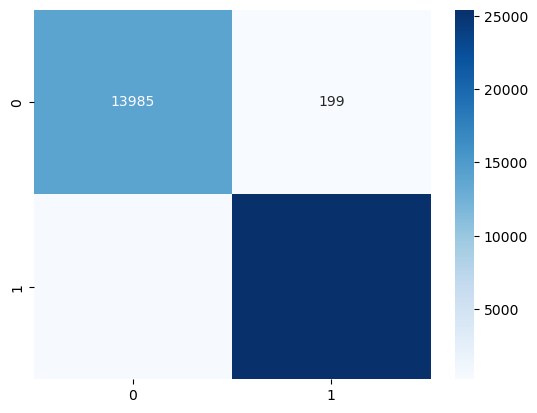

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#Function to generate heat map
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()


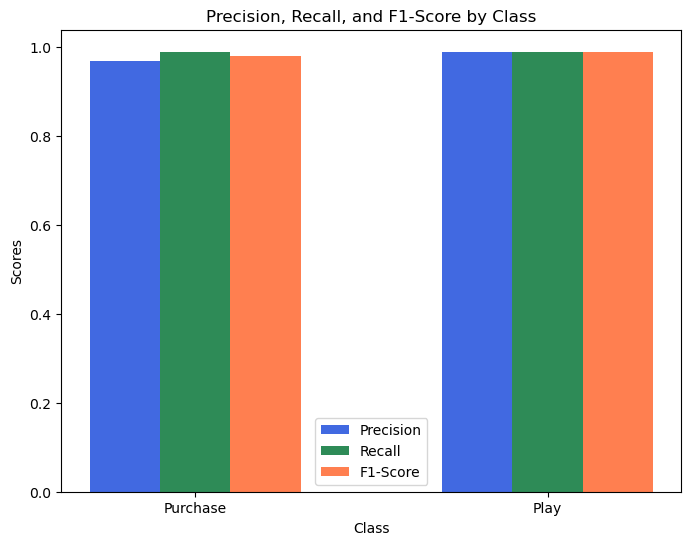

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Function to Define the metrics for each class
metrics = {
    "Class": ["Purchase", "Play"],
    "Precision": [0.97, 0.99],
    "Recall": [0.99, 0.99],
    "F1-Score": [0.98, 0.99]
}

# Function to Create a bar plot for Precision, Recall, and F1-Score
x = np.arange(len(metrics["Class"]))  # label locations
width = 0.2  # bar width

fig, ax = plt.subplots(figsize=(8, 6))

# Function to Plot bars for each metric
rects1 = ax.bar(x - width, metrics["Precision"], width, label="Precision", color='royalblue')
rects2 = ax.bar(x, metrics["Recall"], width, label="Recall", color='seagreen')
rects3 = ax.bar(x + width, metrics["F1-Score"], width, label="F1-Score", color='coral')

# Add some text for labels, title, and custom x-axis tick labels for bar chart
ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(metrics["Class"])
ax.legend()

# Display the chart
plt.show()
